In [1]:
import pandas as pd
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir, r'data\donnees-historiques\prix\hourly_day_ahead_prices_2017_2020.parquet')
"""
file2_path = '/content/drive/MyDrive/AugmentForecast/data/scenarios-synthetiques/prix/00257.parquet'
file3_path = '/content/drive/MyDrive/AugmentForecast/data/scenarios-synthetiques/prix/00724.parquet'
"""
data = pd.read_parquet(file_path)

"""
data2 = pd.read_parquet(file2_path)
data3 = pd.read_parquet(file3_path)
"""


# Dossier contenant les fichiers Parquet
parquet_dir = os.path.join(base_dir, r'data\scenarios-synthetiques\prix')

# Liste pour stocker les DataFrames
synthetic_data_list = []

# Charger chaque fichier Parquet
for file in os.listdir(parquet_dir):
    if file.endswith(".parquet"):
        file_path = os.path.join(parquet_dir, file)
        synthetic_data_list.append(pd.read_parquet(file_path))

# Combiner tous les DataFrames en un seul
synthetic_data = pd.concat(synthetic_data_list)

# Vérifier les données combinées
print(synthetic_data.head())


horizons = [6, 12, 24, 48, 72, 168]  # En heures

   price  dayofweek  hourofday
0  31.66          0          0
1  31.06          0          1
2  27.81          0          2
3  27.54          0          3
4  25.04          0          4


In [2]:
data.describe()

,price
count,35064.000000
mean,41.697606
std,18.600285
min,-75.820000
25%,30.180000
50%,39.900000
75%,51.422500
max,259.950000


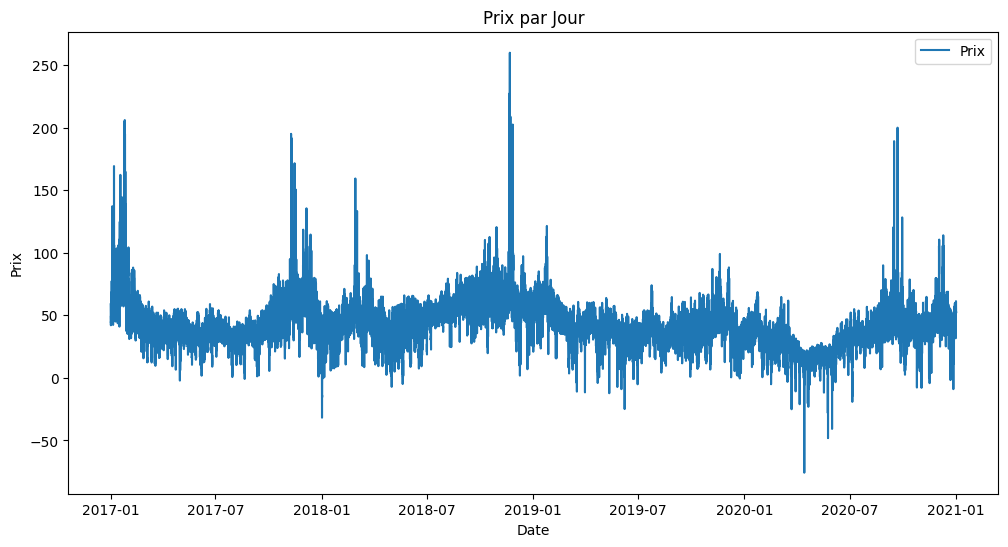

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()

In [4]:
# Conversion de l'index des données synthétiques en Timestamp avec UTC
synthetic_data.index = pd.to_datetime(synthetic_data.index, unit='h', origin='2016-12-31 23:00:00', utc=True)
synthetic_data.rename(columns={"index": "date"}, inplace=True)  # Renommer la colonne


In [5]:
synthetic_data = synthetic_data.drop(columns=["hourofday","dayofweek"])  # Supprimer

In [6]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381376 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
dtypes: float64(1)
memory usage: 82.1 MB


c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


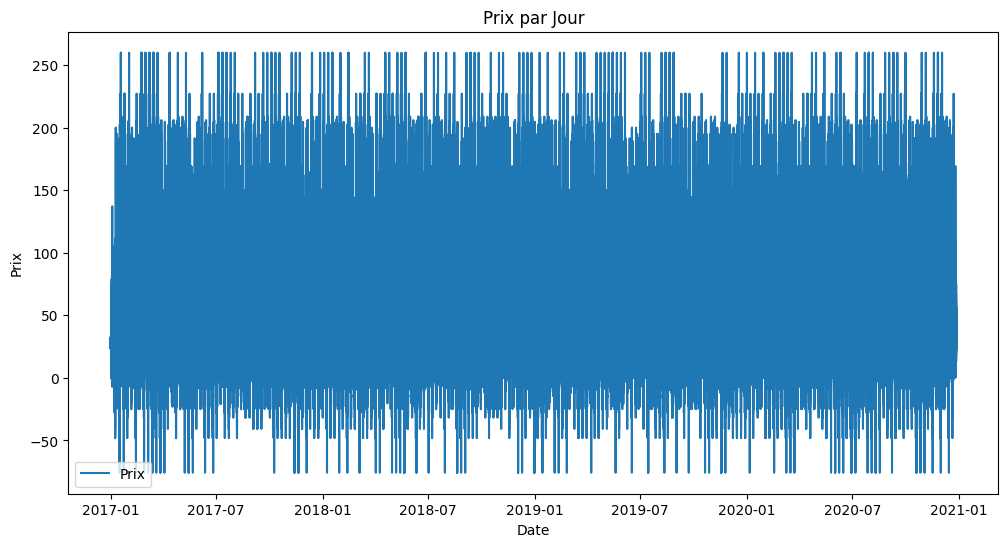

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(synthetic_data.index, synthetic_data['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()

### gestion du volume des données synthetiques

In [8]:
# Agrégation horaire (moyenne des scénarios pour chaque heure)
synthetic_aggregated = synthetic_data.groupby(level=0).mean()
data_combined = pd.concat([data, synthetic_aggregated])

In [9]:
print(synthetic_data.info())
print(synthetic_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381376 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
dtypes: float64(1)
memory usage: 82.1 MB
None
              price
count  5.381376e+06
mean   4.165089e+01
std    1.797841e+01
min   -7.582000e+01
25%    3.048000e+01
50%    3.986000e+01
75%    5.100000e+01
max    2.599500e+02


In [10]:
print(synthetic_aggregated.info())
print(synthetic_aggregated.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34944 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   34944 non-null  float64
dtypes: float64(1)
memory usage: 546.0 KB
None
              price
count  34944.000000
mean      41.650886
std        8.713591
min       18.554221
25%       34.008994
50%       42.948864
75%       48.271737
max       68.028052


In [11]:
print(data_combined.info())
print(data_combined.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70008 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   70008 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB
None
              price
count  70008.000000
mean      41.674286
std       14.531952
min      -75.820000
25%       32.450000
50%       41.550000
75%       49.438295
max      259.950000


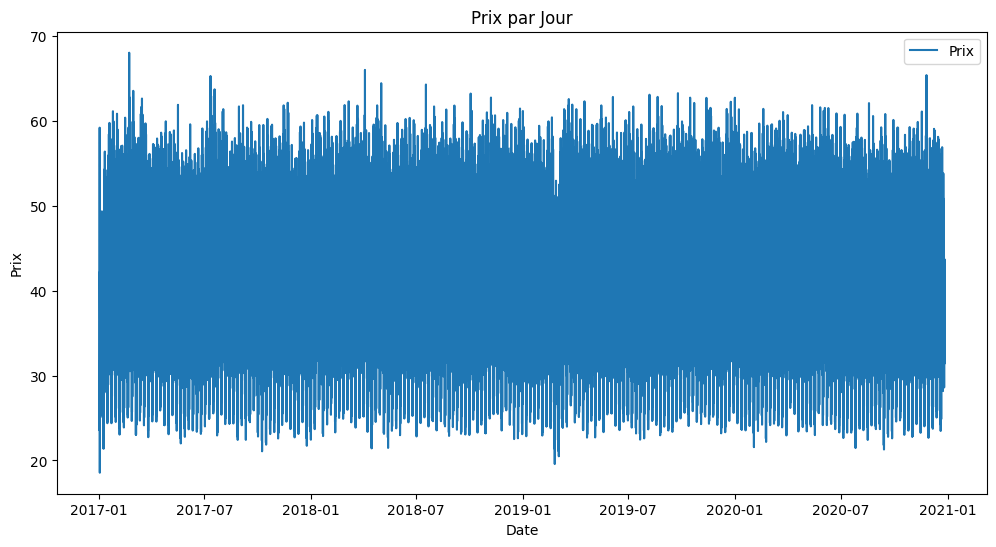

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(synthetic_aggregated.index, synthetic_aggregated['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()

### FUsion

In [13]:
data_combined = pd.concat([data, synthetic_aggregated]).sort_index()

# Vérification des données combinées
print(data_combined.info())
print(data_combined.describe())




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70008 entries, 2016-12-31 23:00:00+00:00 to 2020-12-31 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   70008 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB
None
              price
count  70008.000000
mean      41.674286
std       14.531952
min      -75.820000
25%       32.450000
50%       41.550000
75%       49.438295
max      259.950000


In [14]:
# Vérifiez qu'il n'y a pas de valeurs manquantes
print(data_combined.isna().sum())

price    0
dtype: int64


### train

In [15]:
# Créer des features temporelles
data_combined['hour'] = data_combined.index.hour  # Heure de la journée
data_combined['day_of_week'] = data_combined.index.dayofweek  # Jour de la semaine (0 = Lundi)
data_combined['is_weekend'] = (data_combined['day_of_week'] >= 5).astype(int)  # 1 = Week-end

# Ajouter des décalages temporels (lag features)
data_combined['price_lag_1'] = data_combined['price'].shift(1)  # Lag de 1
data_combined['price_lag_24'] = data_combined['price'].shift(24)  # Lag d'une journée (pour données horaires)

# Supprimer les lignes avec des NaN (causés par les lags)
data_combined.dropna(inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation des colonnes numériques
scaler = MinMaxScaler()
data_combined[['price_scaled', 'price_lag_1', 'price_lag_24']] = scaler.fit_transform(data_combined[['price', 'price_lag_1', 'price_lag_24']])

In [17]:
# Division temporelle des données
train = data_combined[:'2019']
test = data_combined['2020':]

# Vérifier les dimensions des ensembles
print(f"Train : {train.shape[0]} lignes")
print(f"Test : {test.shape[0]} lignes")



Train : 52538 lignes
Test : 17446 lignes


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Liste pour stocker les prédictions par horizon
# Liste pour stocker les prédictions
model_name='SARIMAX'
predictions = {}

# Ajout de tqdm pour suivre la progression
for horizon in tqdm(horizons, desc="Prédiction Multi-Horizons"):
    # Entraîner un modèle SARIMA pour chaque horizon
    model = SARIMAX(train['price'],
                    order=(1, 1, 1),  # ARIMA(p, d, q)
                    seasonal_order=(1, 1, 1, 24),  # Période saisonnière
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Faire des prédictions sur l'horizon défini
    forecast = sarima_model.forecast(steps=horizon)
    predictions[horizon] = forecast




Prédiction Multi-Horizons:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-package

In [19]:
# Ajouter les données réelles pour chaque horizon
for horizon in horizons:
    test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer

# Vérifier les données
print(test.head())


                               price  hour  day_of_week  is_weekend  \
2020-01-01 00:00:00+00:00  32.634481     0            2           0   
2020-01-01 00:00:00+00:00  38.600000     0            2           0   
2020-01-01 01:00:00+00:00  36.550000     1            2           0   
2020-01-01 01:00:00+00:00  30.002013     1            2           0   
2020-01-01 02:00:00+00:00  31.676883     2            2           0   

                           price_lag_1  price_lag_24  price_scaled  \
2020-01-01 00:00:00+00:00     0.330084      0.338684      0.323002   
2020-01-01 00:00:00+00:00     0.323002      0.362831      0.340769   
2020-01-01 01:00:00+00:00     0.340769      0.338982      0.334664   
2020-01-01 01:00:00+00:00     0.334664      0.363687      0.315162   
2020-01-01 02:00:00+00:00     0.315162      0.343688      0.320150   

                           price_horizon_6  price_horizon_12  \
2020-01-01 00:00:00+00:00        37.559481         54.480260   
2020-01-01 00:00:00+00:0

C:\Users\akues\AppData\Local\Temp\ipykernel_1628\4042875089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer
C:\Users\akues\AppData\Local\Temp\ipykernel_1628\4042875089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer
C:\Users\akues\AppData\Local\Temp\ipykernel_1628\4042875089.py:3: SettingWithCopyWarning: 
A value is tryi

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialiser un dictionnaire pour stocker les métriques
metrics = {}

# Évaluer pour chaque horizon
# Ajuster la taille de actual et predicted pour chaque horizon
for horizon in horizons:
    # Données réelles ajustées pour correspondre à la longueur des prédictions
    actual = test[f'price_horizon_{horizon}'].iloc[:len(predictions[horizon])].dropna()

    # Prédictions pour l'horizon
    predicted = predictions[horizon]

    # Calculer les métriques uniquement sur les tailles correspondantes
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    # Stocker les métriques
    metrics[horizon] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Afficher les métriques
for horizon, metric in metrics.items():
    print(f"Horizon {horizon}h : MAE = {metric['MAE']:.2f}, RMSE = {metric['RMSE']:.2f}, MAPE = {metric['MAPE']:.2f}%")


ValueError: Length of values (18) does not match length of index (12)

ConversionError: Failed to convert value(s) to axis units: '2020-01-01'

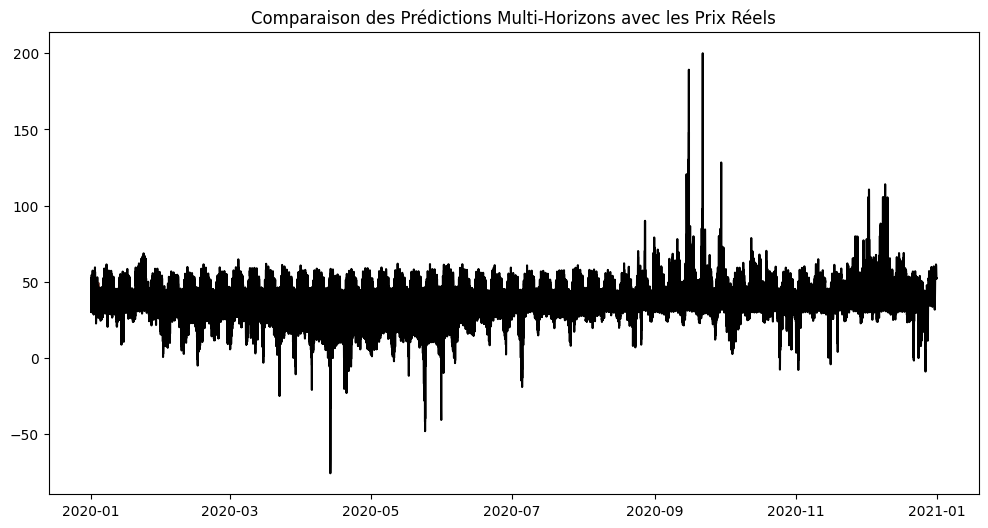

In [22]:
import matplotlib.pyplot as plt

# Visualiser les prédictions vs. les valeurs réelles
plt.figure(figsize=(12, 6))

for horizon in horizons:
    plt.plot(test.index[:len(predictions[horizon])], predictions[horizon], label=f'Prédictions {horizon}h')

# Tracer les données réelles
plt.plot(test.index, test['price'], label='Prix Réels', color='black')

plt.title('Comparaison des Prédictions Multi-Horizons avec les Prix Réels')
plt.xlim('2020-01-01', '2020-01-08')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


In [23]:
print("Longueur de actual :", len(actual))
print("Longueur de predicted :", len(predicted))
print("Index actual :", actual.index)
print("Index predicted :", predicted.index)


Longueur de actual : 6
Longueur de predicted : 6
Index actual : DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 00:00:00+00:00',
               '2020-01-01 01:00:00+00:00', '2020-01-01 01:00:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
Index predicted : RangeIndex(start=52538, stop=52544, step=1)
